In [1]:
# Import relevant libraries here 
import otter
grader = otter.Notebook()

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#### Name: Sehar Salman Haider
#### Roll Number: 25100072

### Submission Instructions 

- Submit a zip file containing only this notebook. Name the zip file `X_DA4`, where X is your rollnumber.
- Rename the notebook `rollnumber_DA4.ipynb` by replacing `rollnumber` with your rollnumber.
- Please make sure all cells have been run.  

### Dataset Description 

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

*Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.*

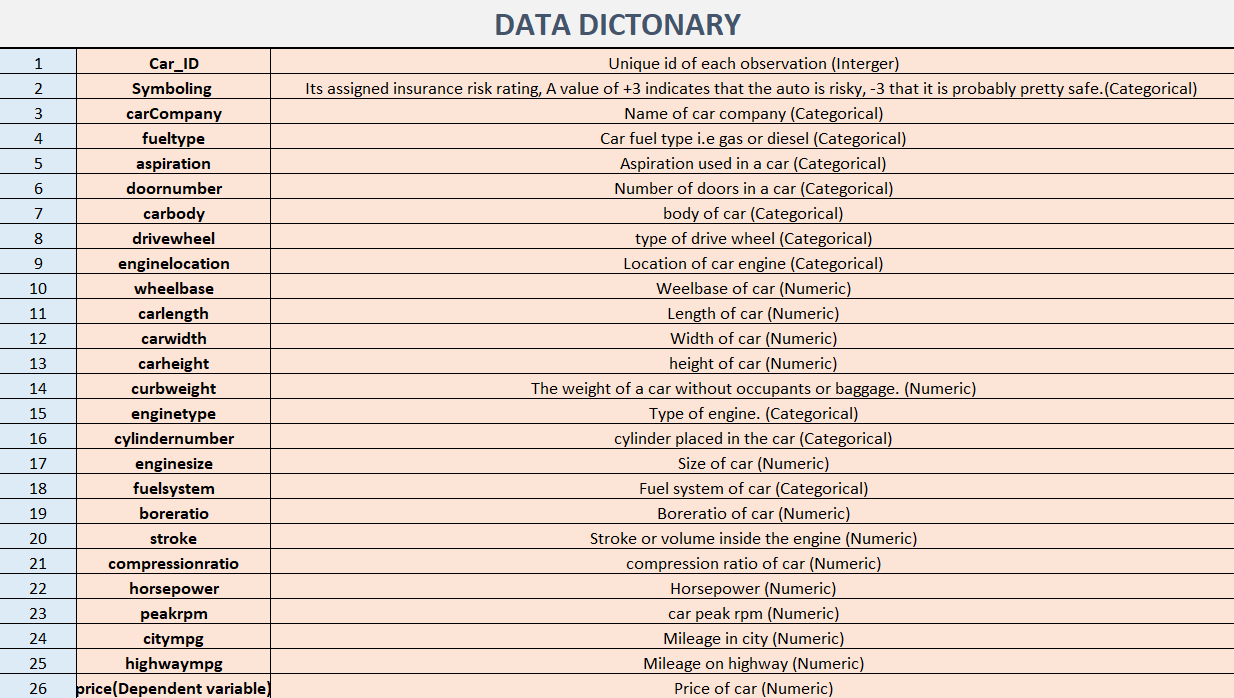

### Objective 

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

#### Understanding your Data 

**1. Read the dataset into a dataframe and store it in the variable `df`.**

In [3]:
# Write code here 
df = pd.read_csv("CarPrice_Assignment.csv")

**2. Display the first 10 rows of the dataset.**

In [4]:
# Write code here 
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

**3. Recall the concept of uninformative features. Identify and write (as a comment) any attributes from the dataset that, in your opinion, should have no effect on the price of a car. This is an open-ended question.**

Cylinder Number


In [6]:
# Write answer here 
#doornumber # in this data only 2% datapoints map to 2 car doors
#symboling
#fuelsystem --> assuming in pakistan for eg most cars run on petrol and few on diesel
#carName


#### Data Cleaning and Exploratory Data Analysis 

**4a. Check for missing values in the dataset.** 

In [7]:
# Write code here 
missing = df.isnull().sum()


In [8]:
print("Missing Values per Column:")
print(missing)

Missing Values per Column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [9]:
print("\nColumns with Missing Values:")
print(missing[missing > 0])


Columns with Missing Values:
Series([], dtype: int64)


In [10]:
grader.check("q4a")

q4a results: All test cases passed!

**4b. Drop the attributes '*CarName*', '*fuelsystem*' and '*cylindernumber*'.**

In [11]:
# Write code here 
df = df.drop(['CarName', 'fuelsystem','cylindernumber'], axis=1)


In [12]:
grader.check("q4b")

q4b results: All test cases passed!

**4c. Now that you are well versed in data cleaning, clean the data to make predictions more accurate.**

<li>You need to deal with missing data. You are not allowed simply drop all rows with missing data.</li>
<li>Filter out (drop) missing values the dependent variable column. </li>
<li>For the remaining columns, come up with an approrpiate strategy to deal with missing values.</li> 

In [13]:
#There are no missing values
#however if there were some missing values simply take mean or median of that col and replace missing value with that
#for categorical col maybe fit to most common category.

In [14]:

# if lets say that there were missing values in price col
# simply take mean or median
df['price'].describe()

# USE THIS CODE FOR NUMERIC REPLACEMENT OF MISSING VALS
# from sklearn.impute import SimpleImputer
# numeric_imputer = SimpleImputer(strategy='mean')  # Change to 'median' if needed
# df['price'] = numeric_imputer.fit_transform(df['price'])


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**5. Provide descriptive statistics for numerical attributes (using a single pandas function) for the dataset.**

In [15]:
# Write code here 
descriptive_stats = df.describe()

In [16]:
print(descriptive_stats)

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

#### Univariate Analysis 

**6a. Plot a histogram for the target (dependent) variable column to understand the distribution of data** 

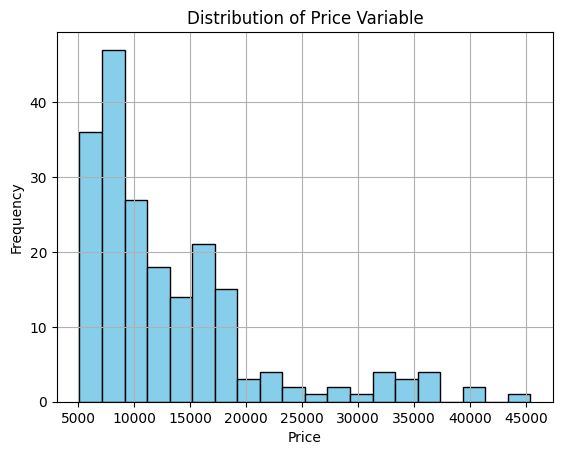

In [17]:
# Write code here 
df['price'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Price Variable')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**6b. Plot a bar graph for the `enginelocation` attribute to undertstand the distribution of data.**

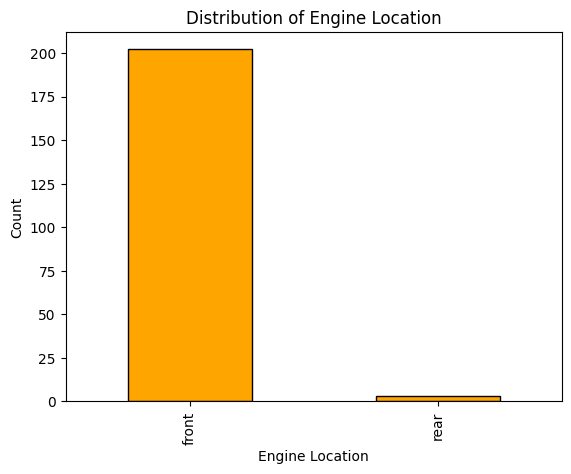

In [18]:
# Write code here 
df['enginelocation'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Engine Location')
plt.xlabel('Engine Location')
plt.ylabel('Count')
plt.show()

**6c. Identify a problem with the `enginelocation` column. Correct this to prepare your data before modelling it.**

C:\Users\sehar\AppData\Local\Temp\ipykernel_12252\2156464500.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='enginelocation', y='price', data=df, palette='Set2')


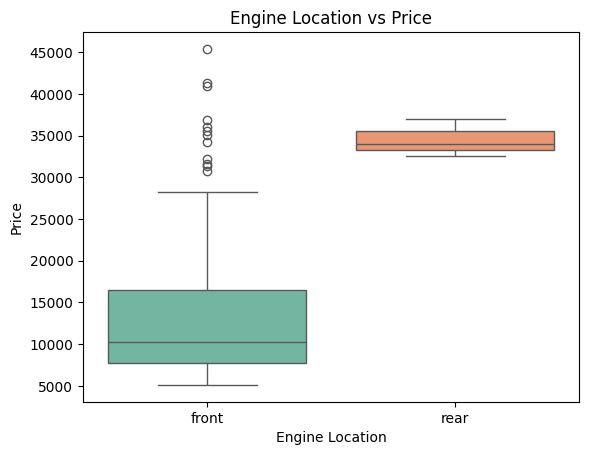

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a boxplot to visualize price vs engine location
sns.boxplot(x='enginelocation', y='price', data=df, palette='Set2')
plt.title('Engine Location vs Price')
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.show()


from the above graph i can see that rear cars have higher median. (maybe these are luxury cars). The data is also heavily skewed on ly 2% of cars have rear engine.

In terms of preprocessing i don't think so i should balance both these classes because that would change my data. Moreover, in real-life as well less cars have engines in rear, and balancing the skew b/w these two data may not be a good idea as it won't represent real-worl data anymore

#### Bivariate Analysis 

**7a. Plot a scatter plot between the two attributes `price` and `enginesize`.** 

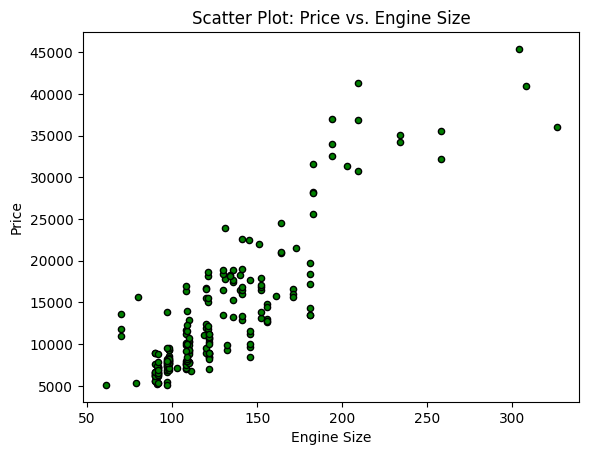

In [20]:
# Write code here
df.plot.scatter(x='enginesize', y='price', color='green', edgecolor='black')
plt.title('Scatter Plot: Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


**7b. Comment on the correlation observed between the two.** 

This is a strong positive corelation b/w engine size and price. As size increases the price also increases. But we also see dispersion in the graph which may indicate variability in price for a given engine size. This could be due to other influencing factors like brand, features, or market conditions.

#### Data Preparation 

**8. Identify and perform one-hot encoding on necessary categorical attributes.** 

In [21]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    print(f"Column '{col}':")
    print(df[col].unique())
    print("-" * 50)  # Separator for better readability


Column 'fueltype':
['gas' 'diesel']
--------------------------------------------------
Column 'aspiration':
['std' 'turbo']
--------------------------------------------------
Column 'doornumber':
['two' 'four']
--------------------------------------------------
Column 'carbody':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
--------------------------------------------------
Column 'drivewheel':
['rwd' 'fwd' '4wd']
--------------------------------------------------
Column 'enginelocation':
['front' 'rear']
--------------------------------------------------
Column 'enginetype':
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
--------------------------------------------------


In [22]:
# Write code here 
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [23]:
# Convert all boolean columns to integers (1s and 0s)
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool']).columns})


In [24]:
grader.check("q8")

q8 results: All test cases passed!

**9. Feature scaling is an important step taken prior to passing data to machine learning models, in order to ensure the features are within the same scale. Otherwise, some features may dominate over others. In this question, you are required to perform normalization on the following columns of the dataframe:** 

- `wheelbase` 
- `carlength` 
- `carwidth` 
- `carheight` 
- `carweight` 
- `enginesize` 
- `horsepower` 
- `peakrpm` 

In [25]:
# Write code here 
columns_to_normalize = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                        'curbweight', 'enginesize', 'horsepower', 'peakrpm']
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [26]:
grader.check("q9")

q9 results: All test cases passed!

**10a. Display a correlation heatmap for selected numerical columns of the dataframe now.** 


**10b. Identify any features that do not have a direct linear correlation with the price of a car.**

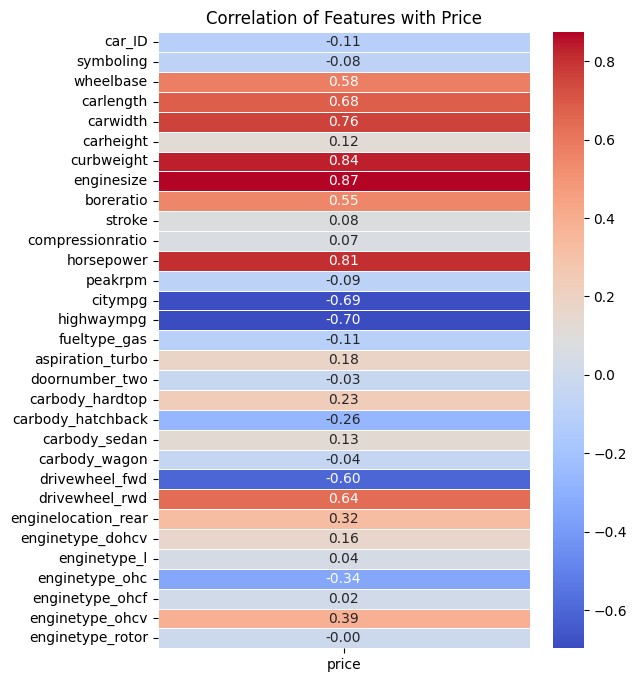

In [27]:
# Calculate correlations
correlations = df.corr()

# Extract the 'price' row and drop the correlation of price with itself
price_correlations = correlations[['price']].drop('price')

# Create a heatmap of 'price' vs other features
plt.figure(figsize=(6, 8))
sns.heatmap(price_correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with Price')
plt.show()

Ans 10b

In [28]:
# Set a threshold for weak or no correlation (e.g., absolute correlation < 0.1)
threshold = 0.1

# Identify columns with weak or no linear correlation to price
weakly_correlated_features = price_correlations[abs(price_correlations['price']) < threshold].index

print("Columns with No/Weak Linear Correlation to Price:")
print(weakly_correlated_features)


Columns with No/Weak Linear Correlation to Price:
Index(['symboling', 'stroke', 'compressionratio', 'peakrpm', 'doornumber_two',
       'carbody_wagon', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor'],
      dtype='object')


#### Data Splitting 

In [29]:
from sklearn.model_selection import train_test_split


**11a. Dataset splitting. Create a 75-25 train-test split to train and evaluate your model. Store the data in `train_df` and `test_df` respectively.** 

In [30]:
# Write code here 
train_df, test_df = train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

In [31]:
grader.check("q11a")

q11a results: All test cases passed!

**11b. Feature selection. Select features for input and for predicition, store these attributes in `train_x` & `train_y`, and `test_x` & `test_y` variables respectively for each set.** 

In [32]:
columns_to_exclude = ['price', 'symboling', 'car_ID']

In [33]:
# Write code here 
test_x = test_df[[col for col in test_df.columns if col not in columns_to_exclude]]
test_y = test_df['price']

train_x = train_df[[col for col in train_df.columns if col not in columns_to_exclude]]
train_y = train_df['price']



In [34]:
grader.check("q11b")

q11b results: All test cases passed!

#### Machine Learning 

In [35]:
import statsmodels.api as sm


**12. Use Statsmodels to train a multiple linear regression model on the data to predict the price of a car. We will be using Ordinary Least Squares. Print out the summary of your model.**

*Note: Do not forget to add a constant bias variable.* 

In [36]:
# Write code here
# Add a constant bias term to train_x
train_x = sm.add_constant(train_x)

# Train the Ordinary Least Squares (OLS) model
model = sm.OLS(train_y, train_x).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     65.52
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.89e-61
Time:                        22:43:57   Log-Likelihood:                -1375.6
No. Observations:                 153   AIC:                             2811.
Df Residuals:                     123   BIC:                             2902.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.789e+04   1

**13. Test this model on your test set to obtain a list of predictions.** 

In [37]:
# Write code here 
test_x = sm.add_constant(test_x)  # Add a constant (intercept term) to the test set

# Make predictions using the trained model
predictions = model.predict(test_x)



**14. Comment on the statistical significance of your variables in predicting the price of a car, from your given dataset. Comment on any five.** 


1. **carwidth**:
   - **P>|t|** = 0.000
   - This is highly significant (\(P<0.05\)). The coefficient of \(1.202 \times 10^4\) suggests that an increase in car width positively affects car price, with the price increasing by approximately $12,020 per unit increase in car width, holding other variables constant.

2. **carheight**:
   - **P>|t|** = 0.027
   - This is statistically significant (\(P<0.05\)). The coefficient of 3598.60 indicates that an increase in car height positively affects the car price, with the price increasing by approximately $3598 per unit increase in car height, holding other variables constant.

3. **enginesize**:
   - **P>|t|** = 0.000
   - This is highly significant (\(P<0.05\)). The coefficient of \(3.727 \times 10^4\) indicates that larger engine sizes greatly increase car prices, with a substantial increase of approximately $37,270 per unit increase in engine size.

4. **stroke**:
   - **P>|t|** = 0.000
   - This is highly significant (\(P<0.05\)), but the coefficient of -4383.09 indicates that as the stroke increases, the car price decreases by approximately $4383 per unit increase, holding other variables constant. This may point to specific market dynamics where larger strokes are less valued.

5. **horsepower**:
   - **P>|t|** = 0.099
   - This is not statistically significant at the \(0.05\) level (\(P>0.05\)). While the coefficient is negative (-7806.74), indicating that an increase in horsepower might decrease the price, this relationship is not strong enough to draw a definitive conclusion.



**15. Plot a graph of your 3 most significant explanatory variables on the x axis and the predicted variable `price` on the y axis**

Note: You are expected to plot all three explanatory variables on the same graph. You can use any EDA technique as long as a trend between the variables is depicted (if any).

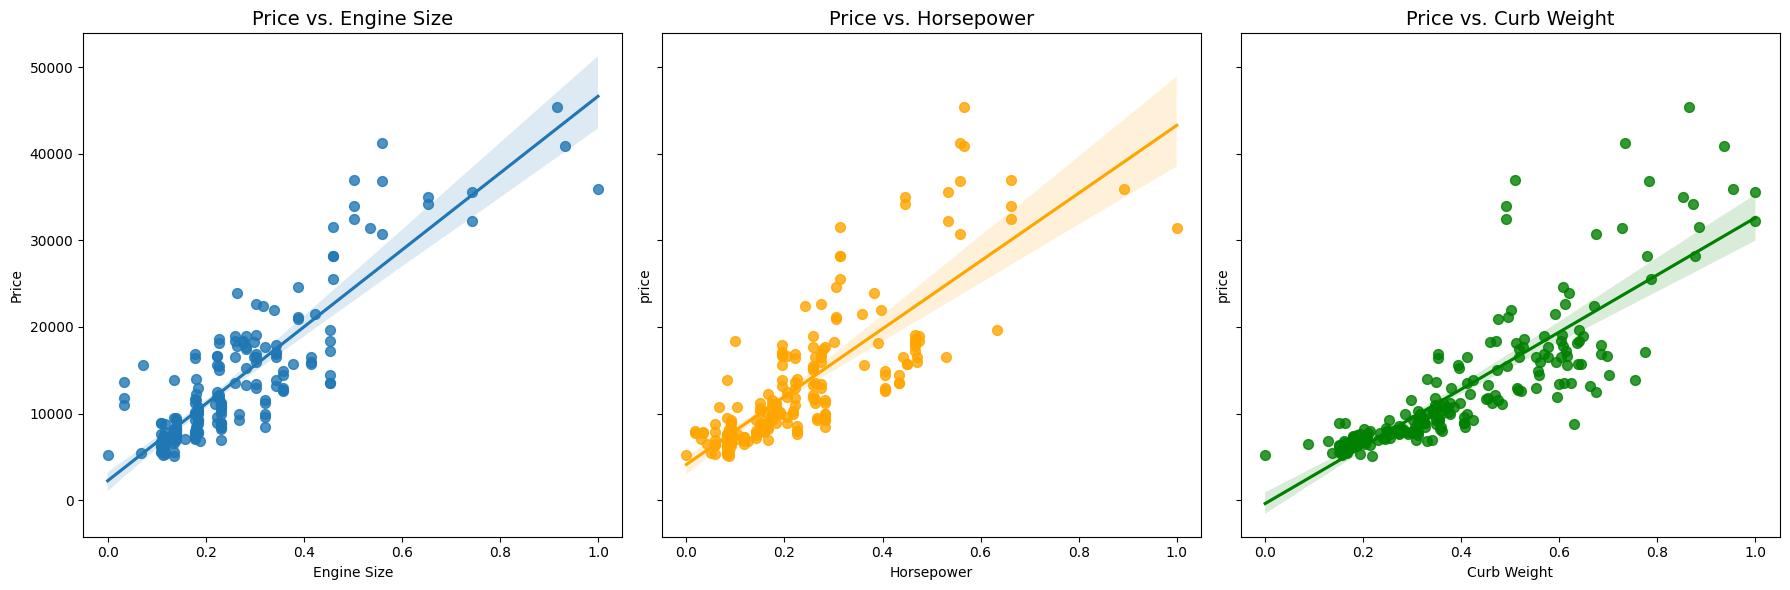

In [38]:
# Set up the figure and axes for three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot 1: Engine Size vs. Price
sns.regplot(x='enginesize', y='price', data=df, ax=axes[0], scatter_kws={'s': 50})
axes[0].set_title('Price vs. Engine Size', fontsize=14)
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Price')

# Plot 2: Horsepower vs. Price
sns.regplot(x='horsepower', y='price', data=df, ax=axes[1], scatter_kws={'s': 50}, color='orange')
axes[1].set_title('Price vs. Horsepower', fontsize=14)
axes[1].set_xlabel('Horsepower')

# Plot 3: Curb Weight vs. Price
sns.regplot(x='curbweight', y='price', data=df, ax=axes[2], scatter_kws={'s': 50}, color='green')
axes[2].set_title('Price vs. Curb Weight', fontsize=14)
axes[2].set_xlabel('Curb Weight')

# Customize layout
plt.tight_layout()
plt.show()

**16a. Implement the function `calculateR2score` that takes as an input**
- **The output column in `test_df` and**
- **The *predicted* output column of the `test_df`.**

**The output of this function should be the R^2 score of the prediction. You must calculate this from scratch.** 

In [39]:
# Write code here
def calculateR2score(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    mean_actual = actual.mean()
    
    # Calculate the total sum of squares (SS_tot)
    ss_tot = ((actual - mean_actual) ** 2).sum()
    
    # Calculate the residual sum of squares (SS_res)
    ss_res = ((actual - predicted) ** 2).sum()
    
    # Calculate R-squared
    r2 = 1 - (ss_res / ss_tot)
    return r2

**16b. Use the function implemented in (a) to obtain the R^2 score for your model implemented using your model.** 

In [40]:
actual = test_y
predicted = predictions
result = calculateR2score(actual=actual,predicted=predicted)

In [41]:
print(result)

0.8295750763330718


In [42]:
grader.check("q16a")

q16a results: All test cases passed!

**17a. The following formula to obtain the optimal parameters in a linear model was discussed in class:**

$\theta = (X^{T}X)^{-1}X^{T}y$

**Implement the function `optimal_params` that takes as an input**
- **The input features as `X` and**
- **The output column (prices) as `y`.**

**The output of this function should be the optimal weights. You must calculate this from scratch.** 

In [43]:
# Write code here
def optimal_params(X,y):
    
    # Compute X^T * X
    X_transpose_X = np.dot(X.T, X)
    
    # Compute the inverse of X^T * X
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    
    # Compute X^T * y
    X_transpose_y = np.dot(X.T, y)
    
    # Calculate the optimal parameters (weights)
    theta = np.dot(X_transpose_X_inv, X_transpose_y)
    
    return theta

In [44]:
grader.check("q17a")

q17a results: All test cases passed!

**17b. Use the function from 17(a) to obtain the parameters according to the OLS model. Then use these to obtain a list of predictions for your test dataset.** 

In [45]:
# Write code here 
theta = optimal_params(train_x, train_y)

In [46]:
predictions_theta = np.dot(test_x, theta)

**17c. Compare the results obtained using the OLS model to those generated by Statsmodel (as a comment) by comparing the R^2 score (of the test data) on both. Explain any difference between the optimal and the OLS model.** 

In [47]:
# Write answer here 
r2_sm = result
r2_ols = calculateR2score(test_y,predictions_theta)

print(f'R2 stats model {r2_sm} \nR2 OLS model {r2_ols}')

#ANS
#Both models have nearly identical results and it shows are results are consistent woth both models
#There is some rounding difference but it is not significant enough to cause a difference

R2 stats model 0.8295750763330718 
R2 OLS model 0.8295750763333042


**18. Use sklearn to perform Ridge regression on the data. Evaluate Ridge regression for a range of $\alpha$ values to find the optimal $\alpha$. Report the RMSE of the model for the optimal $\alpha$ on the test set.**

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [49]:
# Write code here 
alpha_values = np.logspace(-6, 6, 13)  # From 1e-6 to 1e6

# Store RMSE for each alpha
rmse_values = []

# Train Ridge regression models for each alpha and calculate RMSE
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_x, train_y)
    y_pred = ridge.predict(test_x)
    rmse = np.sqrt(mean_squared_error(test_y, y_pred))
    rmse_values.append(rmse)

# Find the optimal alpha (the one with the lowest RMSE)
optimal_alpha = alpha_values[np.argmin(rmse_values)]
optimal_rmse = min(rmse_values)

# Output the optimal alpha and its RMSE
print(f"Optimal alpha: {optimal_alpha}")
print(f"RMSE for optimal alpha: {optimal_rmse}")

Optimal alpha: 0.01
RMSE for optimal alpha: 3394.9279097008152


**19. As the value of $\alpha$ increases, you will notice the the weights of the model parameters will start to change. Plot the values of all the weights against $\log(\alpha$) on a single figure. Describe what you see.**

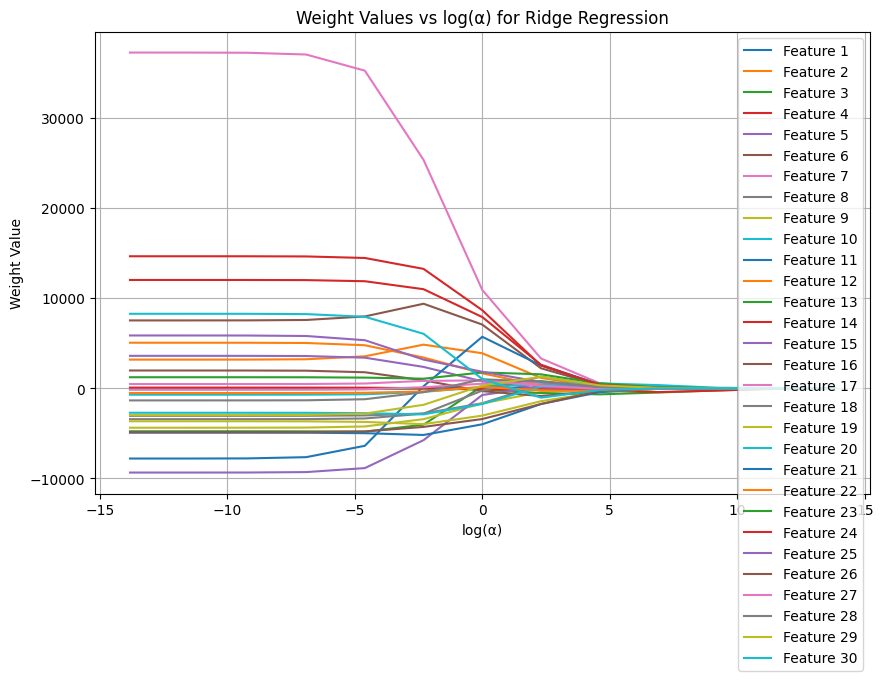

In [50]:
# Write code here
# Store the weights for each alpha
weights = []

# Loop through each alpha and fit the Ridge model
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(train_x, train_y)  # Assuming train_x and train_y are your training data
    weights.append(model.coef_)

# Convert weights to numpy array for easier manipulation
weights = np.array(weights)

# Plot the weights vs log(alpha)
plt.figure(figsize=(10, 6))

# Plot each feature's weight against log(alpha)
for i in range(weights.shape[1]):
    plt.plot(np.log(alpha_values), weights[:, i], label=f'Feature {i+1}')

# Add labels and title
plt.xlabel('log(α)')
plt.ylabel('Weight Value')
plt.title('Weight Values vs log(α) for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

The plot shows how model weights change with increasing \(\log(\alpha)\) in Ridge regression. At low \(\alpha\), weights are large, similar to standard linear regression. As \(\alpha\) increases, regularization reduces the magnitude of weights, pushing less predictive features closer to zero. At high \(\alpha\), all weights converge near zero, simplifying the model to prevent overfitting.


**20. Next, you are required to train a decision tree regressor on the same data. This is to evaluate and ultimately select the best model for the given problem. You are required to use sklearn for this part. Find the RMSE of the test data on the new predictions generated by your decision tree model. Compare this with your linear model at three values of max_depths: 3, 5, and 10.** 

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Define max_depth values
max_depth_values = [3, 5, 10]

# Initialize a dictionary to store RMSE values for each max_depth
rmse_values_tree = {}

# Train and evaluate the Decision Tree for different max_depth values
for max_depth in max_depth_values:
    model_tree = DecisionTreeRegressor(max_depth=max_depth)
    model_tree.fit(train_x, train_y)  # train_x and train_y are your training data
    predictions_tree = model_tree.predict(test_x)  # test_x is your test data
    
    rmse_tree = calculate_rmse(test_y, predictions_tree)  # test_y is the true test labels
    rmse_values_tree[max_depth] = rmse_tree
    
    print(f"RMSE for Decision Tree with max_depth={max_depth}: {rmse_tree}")

# Compare with a linear model (e.g., Ridge)
from sklearn.linear_model import Ridge

# Train the Ridge model (linear model) for comparison
ridge_model = Ridge(alpha=1)  # You can adjust alpha based on your earlier steps
ridge_model.fit(train_x, train_y)
predictions_ridge = ridge_model.predict(test_x)

# Calculate RMSE for the Ridge model
rmse_ridge = calculate_rmse(test_y, predictions_ridge)
print(f"RMSE for Ridge Regression (Linear Model): {rmse_ridge}")

RMSE for Decision Tree with max_depth=3: 3480.14287359217
RMSE for Decision Tree with max_depth=5: 3301.4301113601164
RMSE for Decision Tree with max_depth=10: 3302.90810473139
RMSE for Ridge Regression (Linear Model): 3993.6591898863876


In [53]:
# # Write code here
# Best model is decision tree with max depth 5 as
# it has the lowest RMSE

# is the most suitable option for minimizing prediction error.

**21. A sklearn random forest model has variable number of estimators and maximum depth of trees. Selecting suitable ranges for both parameters, plot a 3D plot of the RMSE against both of these parameters. What do you see? For the optimal values of these parameters report the RMSE on the test data.**

*Note: To learn more about how to use the random forest model in sklearn, please refer to the following link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html*

C:\Users\sehar\AppData\Roaming\Python\Python312\site-packages\mpl_toolkits\mplot3d\proj3d.py:186: RuntimeWarning: invalid value encountered in greater_equal
  tis = (0 <= vecw[0]) & (vecw[0] <= 1) & (0 <= vecw[1]) & (vecw[1] <= 1)
C:\Users\sehar\AppData\Roaming\Python\Python312\site-packages\mpl_toolkits\mplot3d\proj3d.py:186: RuntimeWarning: invalid value encountered in less_equal
  tis = (0 <= vecw[0]) & (vecw[0] <= 1) & (0 <= vecw[1]) & (vecw[1] <= 1)
C:\Users\sehar\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


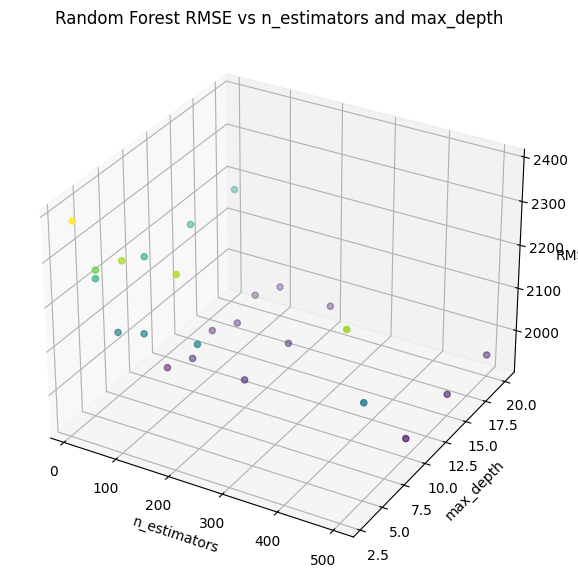

Optimal n_estimators: 50
Optimal max_depth: 20
Optimal RMSE: 1933.4592091003744


In [ ]:
# Write code here
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



# Define ranges for n_estimators and max_depth
n_estimators_range = [10, 50, 100, 200, 500]
max_depth_range = [3, 5, 10, 15, 20, None]  
# Initialize lists to store results
rmse_results = []

# Iterate over n_estimators and max_depth combinations
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # Train the RandomForestRegressor
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(train_x , train_y)
        
        # Make predictions and calculate RMSE
        y_pred = rf.predict(test_x)
        rmse = np.sqrt(mean_squared_error(test_y, y_pred))
        
        # Store the result
        rmse_results.append((n_estimators, max_depth, rmse))

# Convert results to a numpy array for easier manipulation
rmse_results = np.array(rmse_results)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the RMSE values
ax.scatter(rmse_results[:, 0], rmse_results[:, 1], rmse_results[:, 2], c=rmse_results[:, 2], cmap='viridis')

# Labels and title
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('RMSE')
ax.set_title('Random Forest RMSE vs n_estimators and max_depth')

# Show the plot
plt.show()

# Find the optimal parameters
optimal_params = rmse_results[np.argmin(rmse_results[:, 2])]
print(f"Optimal n_estimators: {optimal_params[0]}")
print(f"Optimal max_depth: {optimal_params[1]}")
print(f"Optimal RMSE: {optimal_params[2]}")


 RMSE decreases as both n_estimators and max_depth increase, with the lowest RMSE values observed at higher values of both parameters. This indicates improved performance with more estimators and deeper trees, but excessively high values could lead to overfitting. The optimal parameter combination minimizes RMSE while maintaining model simplicity.

##### Open-ended Research Question

**22a. A large part of machine learning involves using prior domain knowledge or conducting research/exploration to find a model that suits your dataset. This could also involve adjusting hyperparameters, selecting combinations of features, performing feature engineering, or using a new approach altogether.**

Your final task is to find a model that has the lowest RMSE across all the following train-test split ratios (on the provided car dataset).

- 90% Train, 10% Test
- 70% Train, 30% Test
- 50% Train, 50% Test

For this part, you can only use the following five model types: OLS (Ordinary Least Squares), Ridge, Lasso, Decision Tree, or a Random Forest model. Any implementation of the above may be used. You are free to tune the hyperparameters or perform feature engineering.

For output purposes, fit suitable instances of any 2 of the model types on your training data and print the RMSE (of the test data) across the four train-test splits separately. 

In [55]:
# Write code here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


feature_df_x =  df[[col for col in df.columns if col not in columns_to_exclude]]
target_df_y = df['price']

# Train-test splits
splits = [
    (0.9, 0.1),  # 90% train, 10% test
    (0.7, 0.3),  # 70% train, 30% test
    (0.5, 0.5)   # 50% train, 50% test
]

# Define models to evaluate
models = {
    'OLS (Linear Regression)': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Store RMSE results
results = {model: [] for model in models.keys()}

# Evaluate the models across different train-test splits
for train_size, test_size in splits:
    print(f"\nTraining with {int(train_size*100)}% Train, {int(test_size*100)}% Test split")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(feature_df_x, target_df_y, train_size=train_size, random_state=42)

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[model_name].append(rmse)
        print(f"{model_name} RMSE: {rmse}")

# Print summary of results
print("\nSummary of RMSE across different splits:")
for model_name, rmse_list in results.items():
    print(f"{model_name} RMSE across splits: {rmse_list}")
    print(f"Average RMSE: {np.mean(rmse_list)}")



Training with 90% Train, 10% Test split
OLS (Linear Regression) RMSE: 2992.6447594756346
Ridge RMSE: 3618.928638268379
Lasso RMSE: 2961.572005767628
Decision Tree RMSE: 2831.7995211180187
Random Forest RMSE: 2114.1982783696894

Training with 70% Train, 30% Test split
OLS (Linear Regression) RMSE: 3373.446951470638
Ridge RMSE: 4411.584982234061
Lasso RMSE: 3383.035451706332
Decision Tree RMSE: 2991.7293222555027
Random Forest RMSE: 2128.0201708937725

Training with 50% Train, 50% Test split
OLS (Linear Regression) RMSE: 3425.1771452079774
Ridge RMSE: 3859.4190240764865
Lasso RMSE: 3389.8083541329293
Decision Tree RMSE: 2312.0043532895847
Random Forest RMSE: 2169.930197682878

Summary of RMSE across different splits:
OLS (Linear Regression) RMSE across splits: [2992.6447594756346, 3373.446951470638, 3425.1771452079774]
Average RMSE: 3263.75628538475
Ridge RMSE across splits: [3618.928638268379, 4411.584982234061, 3859.4190240764865]
Average RMSE: 3963.310881526309
Lasso RMSE across spli

In [56]:
# Write answer here
# The random forest model is the best as it gives lowest RMSE across all train-test splits

**22b. Lastly, you are required to perform 5 fold cross validation on your finalized best-performing model, in order to ensure that your model has not overfitted to your training data. Comment on results across all splits.** 

In [58]:
# Write code here 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Finalized best-performing model (example: RandomForest)
best_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store RMSE for each fold
rmse_values = []

# Use cross-validation
for train_index, test_index in kf.split(feature_df_x):
    X_train, X_test = feature_df_x.iloc[train_index], feature_df_x.iloc[test_index]
    y_train, y_test = target_df_y.iloc[train_index], target_df_y.iloc[test_index]
    
    # Train the model
    best_model.fit(X_train, y_train)
    
    # Predict
    y_pred = best_model.predict(X_test)
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Print RMSE values across all folds
print("RMSE across 5 folds:", rmse_values)
print("Average RMSE across all folds:", np.mean(rmse_values))
print("Standard Deviation of RMSE across all folds:", np.std(rmse_values))

RMSE across 5 folds: [1999.6294868790037, 1954.1135377620628, 2115.5947537678912, 2272.967320859605, 2420.861684153789]
Average RMSE across all folds: 2152.6333566844705
Standard Deviation of RMSE across all folds: 173.56201161402595


The results show that RMSE are stable across all 5 five folds, hence we can conclude the model generalizes well across all folds. The variability i.e is 8% of the mean which is moderate in my opinion, so the model isn't overfitting too much.
